<a href="https://colab.research.google.com/github/k4404c/MAT-422/blob/main/HW3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **3.4 Logistic Regression**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

* Logistic regression is a model that in its basic form uses a logistic function
to model a binary dependent variable.
 * can be extended to several classes
of events such as classfication of images

Model 1 score: 0.9


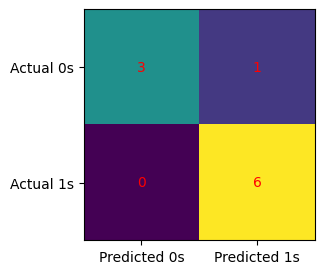

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



Model 2 score: 1.0


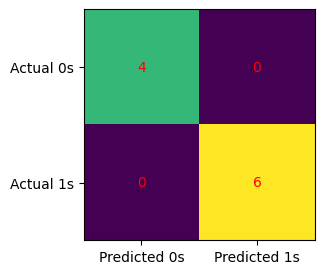

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [27]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

#model = LogisticRegression(solver='liblinear', random_state=0, tol = 0.0001)
#model.fit(x, y)

model = LogisticRegression(solver='liblinear', random_state=0, tol = 0.0001).fit(x, y)
model.predict_proba(x)

model.predict(x)

print(f"Model 1 score: {model.score(x, y)}")

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show() #shows confusion matrix

print(classification_report(y, model.predict(x)))

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
model.score(x, y)
print(f"\n\nModel 2 score: {(model.score(x, y))}")
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(3, 3))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show() #shows confusion matrix

print(classification_report(y, model.predict(x)))



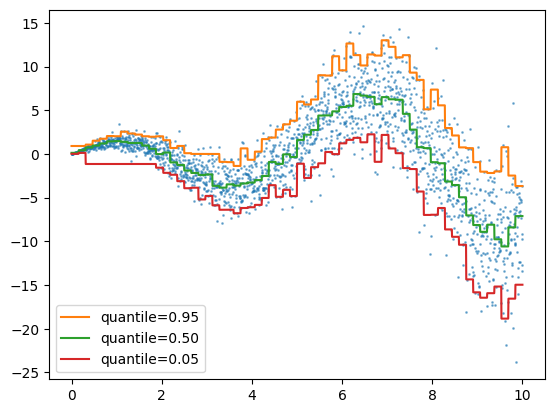

In [41]:
from sklearn.ensemble import HistGradientBoostingRegressor

#regression function for X * cos(X) + sin(X) + noise
rng = np.random.RandomState(42)
X_1d = np.linspace(0, 10, num=2000)
X = X_1d.reshape(-1, 1)
y = X_1d * np.cos(X_1d) +  np.sin(X_1d) + rng.normal(scale=X_1d / 2)

quantiles = [0.95, 0.5, 0.05]
parameters = dict(loss="quantile", max_bins=64, max_iter=50)
hist_quantiles = {
    f"quantile={quantile:.2f}": HistGradientBoostingRegressor(
        **parameters, quantile=quantile
    ).fit(X, y)
    for quantile in quantiles
}

fig, ax = plt.subplots()
ax.plot(X_1d, y, "o", alpha=0.5, markersize=1)
for quantile, hist in hist_quantiles.items():
    ax.plot(X_1d, hist.predict(X), label=quantile)
_ = ax.legend(loc="lower left")
#sourced largely from https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_1_1_0.html#sphx-glr-auto-examples-release-highlights-plot-release-highlights-1-1-0-py
